In [26]:
pip install plotly

  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [3]:
df =  pd.read_csv("most_subscribed_youtube_channels.csv")

# Data Preprocessing

In [4]:
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [5]:
df.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [6]:
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [7]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64

In [8]:
df['video views']=df['video views'].str.replace(',','')
df['video count']=df['video count'].str.replace(',','')
df['subscribers']=df['subscribers'].str.replace(',','')
df['video views']=df['video views'].astype('int64')
df['video count']=df['video count'].astype('int64')
df['subscribers']=df['subscribers'].astype('int64')

In [9]:
nan_value = float("NaN")
df.replace(0, nan_value, inplace=True)
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,222000000,1.984591e+11,17317.0,Music,2006
1,2,YouTube Movies,154000000,NaN,NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,140000000,1.354813e+11,786.0,Education,2006
3,4,SET India,139000000,1.257643e+11,91271.0,Shows,2006
5,6,PewDiePie,111000000,2.846946e+10,4497.0,Gaming,2010


In [10]:
df.dropna(inplace=True)

In [11]:
df['video views']=df['video views'].astype('int64')
df['video count']=df['video count'].astype('int64')
df['subscribers']=df['subscribers'].astype('int64')
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,222000000,198459090822,17317,Music,2006
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
3,4,SET India,139000000,125764252686,91271,Shows,2006
5,6,PewDiePie,111000000,28469458228,4497,Gaming,2010
6,7,MrBeast,102000000,16832456681,726,Entertainment,2012


In [12]:
df.dropna(axis=0,inplace=True)
print("Null count: ",df.isnull().sum())
df.head()
df.dtypes

Null count:  rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64


rank            int64
Youtuber       object
subscribers     int64
video views     int64
video count     int64
category       object
started         int64
dtype: object

In [13]:
df.replace(0, np.nan)
df.isnull().sum()
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,222000000,198459090822,17317,Music,2006
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
3,4,SET India,139000000,125764252686,91271,Shows,2006
5,6,PewDiePie,111000000,28469458228,4497,Gaming,2010
6,7,MrBeast,102000000,16832456681,726,Entertainment,2012


# Exploratory Data Analysis

In [14]:
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,222000000,198459090822,17317,Music,2006
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
3,4,SET India,139000000,125764252686,91271,Shows,2006
5,6,PewDiePie,111000000,28469458228,4497,Gaming,2010
6,7,MrBeast,102000000,16832456681,726,Entertainment,2012


In [16]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
df.iloc[:, 2:5] = m.fit_transform(df.iloc[:, 2:5])
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,1.000000,1.000000,0.052519,Music,2006
2,3,Cocomelon - Nursery Rhymes,0.611559,0.682666,0.002381,Education,2006
3,4,SET India,0.606821,0.633703,0.276819,Shows,2006
5,6,PewDiePie,0.474183,0.143451,0.013636,Gaming,2010
6,7,MrBeast,0.431549,0.084814,0.002199,Entertainment,2012


In [1181]:
df.shape

(971, 7)

In [1182]:
df.dtypes

rank            int64
Youtuber       object
subscribers     int64
video views     int64
video count     int64
category       object
started         int64
dtype: object

In [1183]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [1184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         971 non-null    int64 
 1   Youtuber     971 non-null    object
 2   subscribers  971 non-null    int64 
 3   video views  971 non-null    int64 
 4   video count  971 non-null    int64 
 5   category     971 non-null    object
 6   started      971 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 60.7+ KB


In [1185]:
df.nunique()

rank           971
Youtuber       970
subscribers    281
video views    971
video count    844
category        18
started         18
dtype: int64

In [1186]:
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'category', 'started'}}

nunique_df

{'category':                        category
 Entertainment               241
 Music                       222
 People & Blogs              119
 Gaming                      102
 Comedy                       63
 Film & Animation             50
 Education                    46
 Howto & Style                45
 News & Politics              27
 Science & Technology         18
 Shows                        14
 Sports                       10
 Pets & Animals                6
 Trailers                      2
 Nonprofits & Activism         2
 Movies                        2
 Autos & Vehicles              1
 Travel & Events               1,
 'started':       started
 2014      119
 2011       93
 2015       91
 2013       86
 2012       83
 2016       75
 2006       71
 2009       63
 2017       60
 2010       47
 2007       45
 2008       45
 2018       39
 2005       22
 2019       17
 2020       10
 2021        4
 1970        1}

In [1187]:
categories=df['category'].value_counts()
categories

Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          50
Education                 46
Howto & Style             45
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: category, dtype: int64

In [1188]:
fig=px.pie(values=categories.values,
          names=categories.index,
          color_discrete_sequence=px.colors.sequential.RdBu,
          title="Categories of Youtube Channels", template='presentation'
          )
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.show();

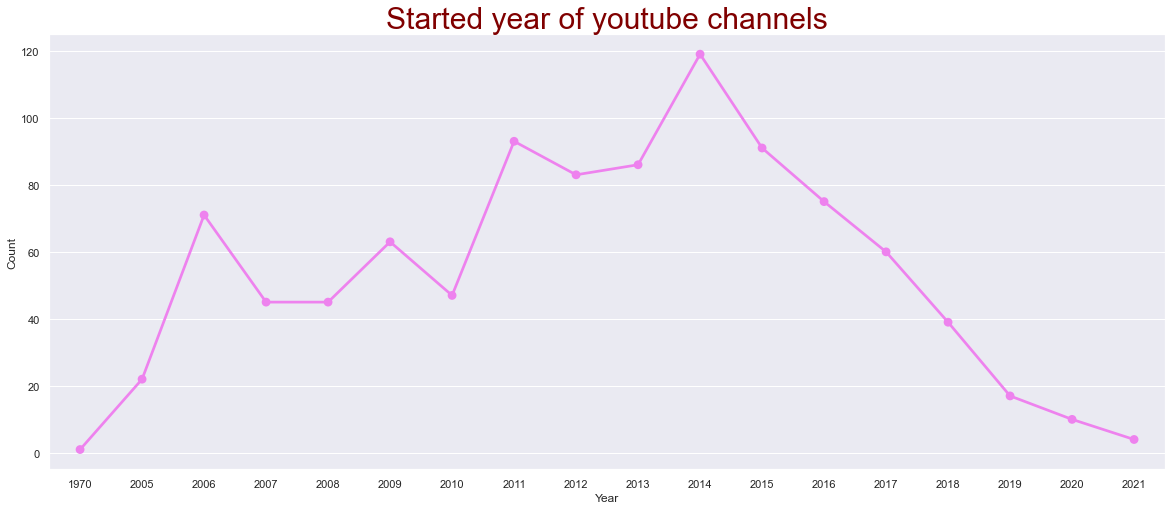

In [1189]:
year=df['started'].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index,y=year.values, color='violet')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Started year of youtube channels',size=30, color='maroon');

In [1190]:
year_mean=df.groupby('started').mean().reset_index()
year_mean.head()

,started,rank,subscribers,video views,video count
0,1970,100.000000,3.330000e+07,2.725287e+09,540.000000
1,2005,423.590909,2.197273e+07,1.044777e+10,15480.409091
2,2006,420.366197,2.789859e+07,1.700543e+10,16846.605634
3,2007,466.866667,2.365111e+07,1.396931e+10,24476.800000
4,2008,452.533333,2.118222e+07,1.140225e+10,14807.333333


In [1191]:
def pltplot(data, xcol, ycol, color, ax, title):
    sns.pointplot(data=data, x=xcol, y=ycol, color=color, ax=ax).set_title(title, size=10)

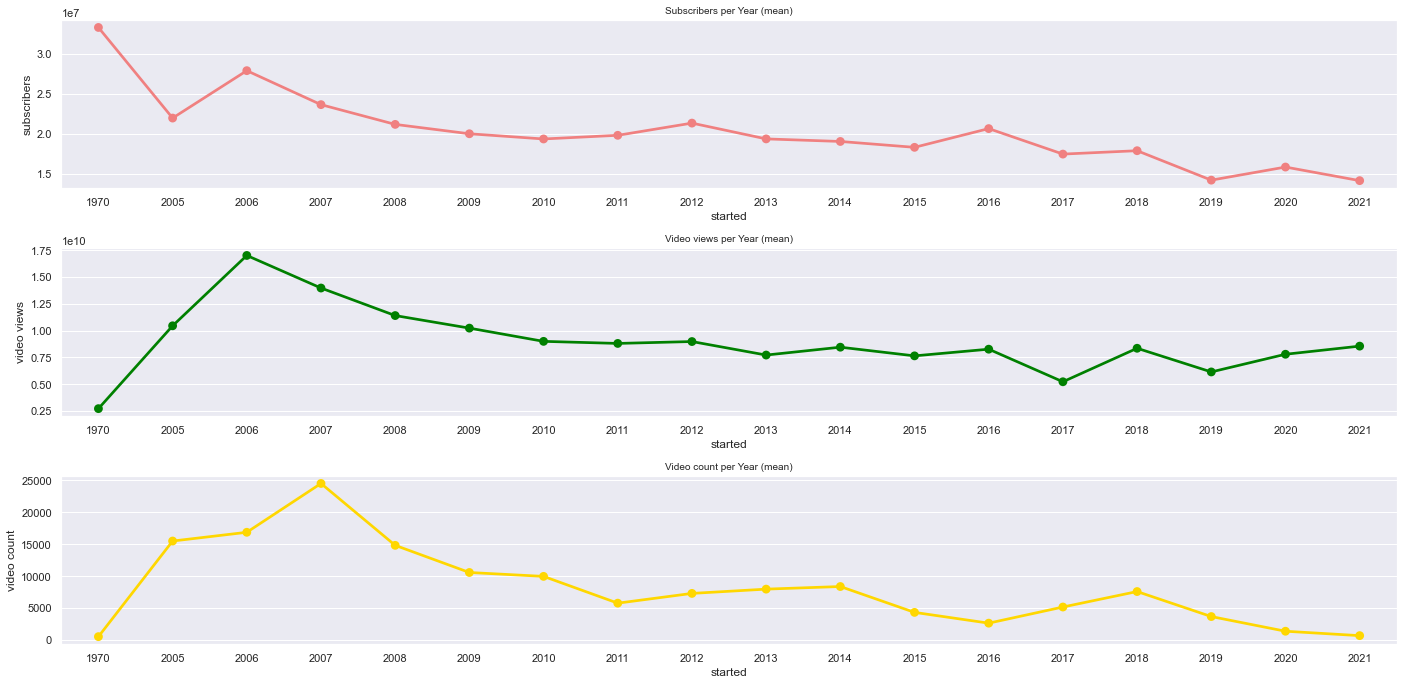

In [1192]:
fig, ((ax1),(ax2),(ax3))=plt.subplots(ncols=1, nrows=3)
fig.set_size_inches(20,10)
fig.tight_layout(pad=3.0)

pltplot(year_mean,'started','subscribers','lightcoral', ax1,'Subscribers per Year (mean)')
pltplot(year_mean,'started','video views','green', ax2,'Video views per Year (mean)')
pltplot(year_mean,'started','video count','gold', ax3,'Video count per Year (mean)')

Text(0.5, 1.0, 'Top 5 Categories that have subscribers')

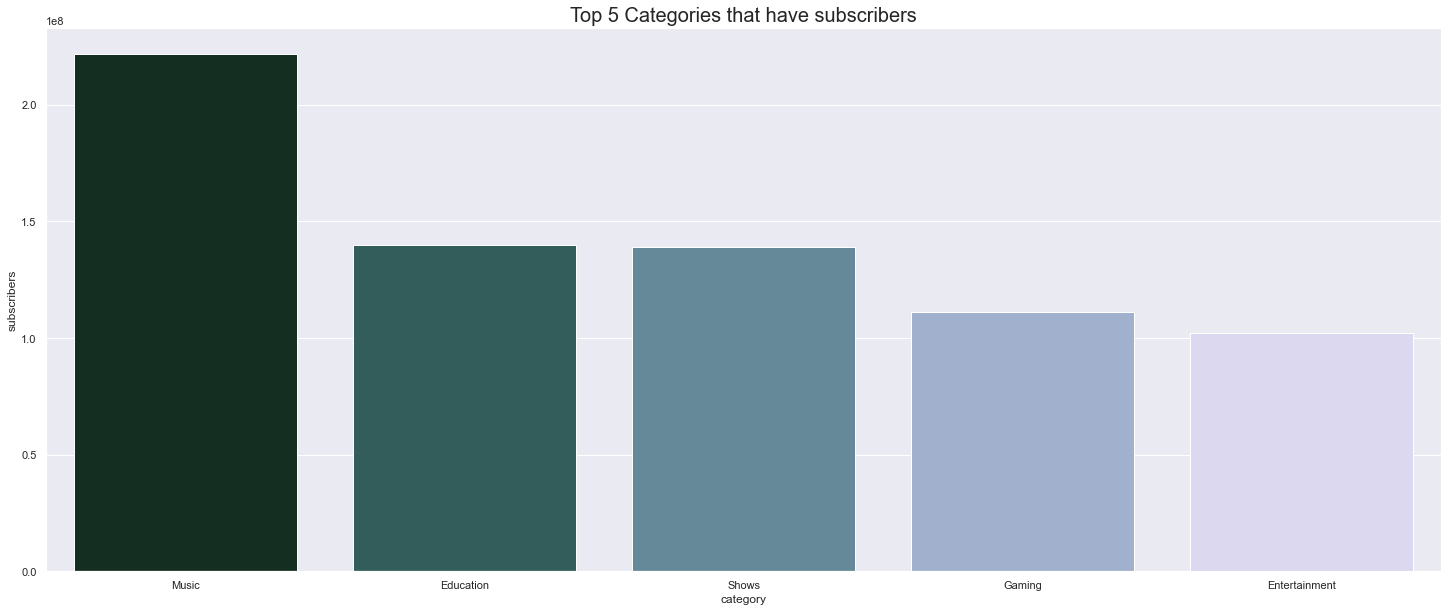

In [1193]:
subscribers=df.sort_values('subscribers',ascending=False)
plt.figure(figsize=(25,10))
subscribers=subscribers[:5]
sns.barplot(x="category",
           y="subscribers",
           data=subscribers,
           palette="ch:20_r")
plt.title('Top 5 Categories that have subscribers',size=20)

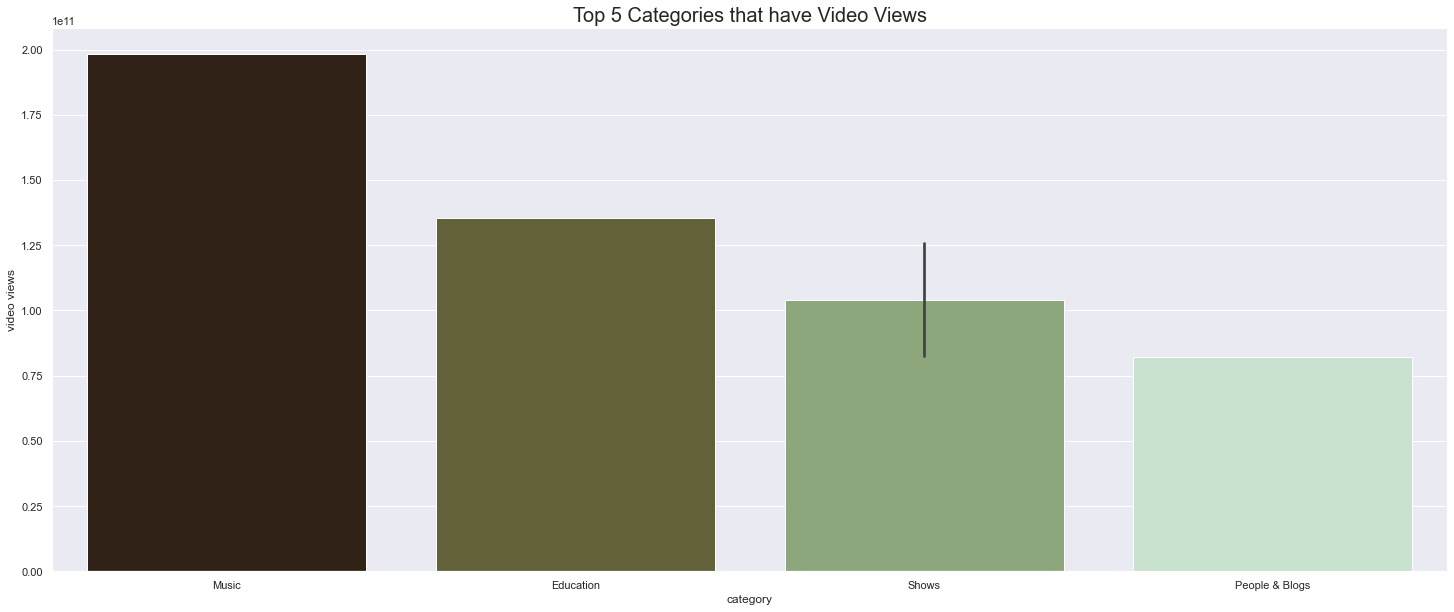

In [1194]:
videoviews=df.sort_values('video views',ascending=False)
plt.figure(figsize=(25,10))
videoviews=videoviews[:5]
sns.barplot(x="category",
           y="video views",
           data=videoviews,
           palette="ch:40_r")
plt.title('Top 5 Categories that have Video Views',size=20);

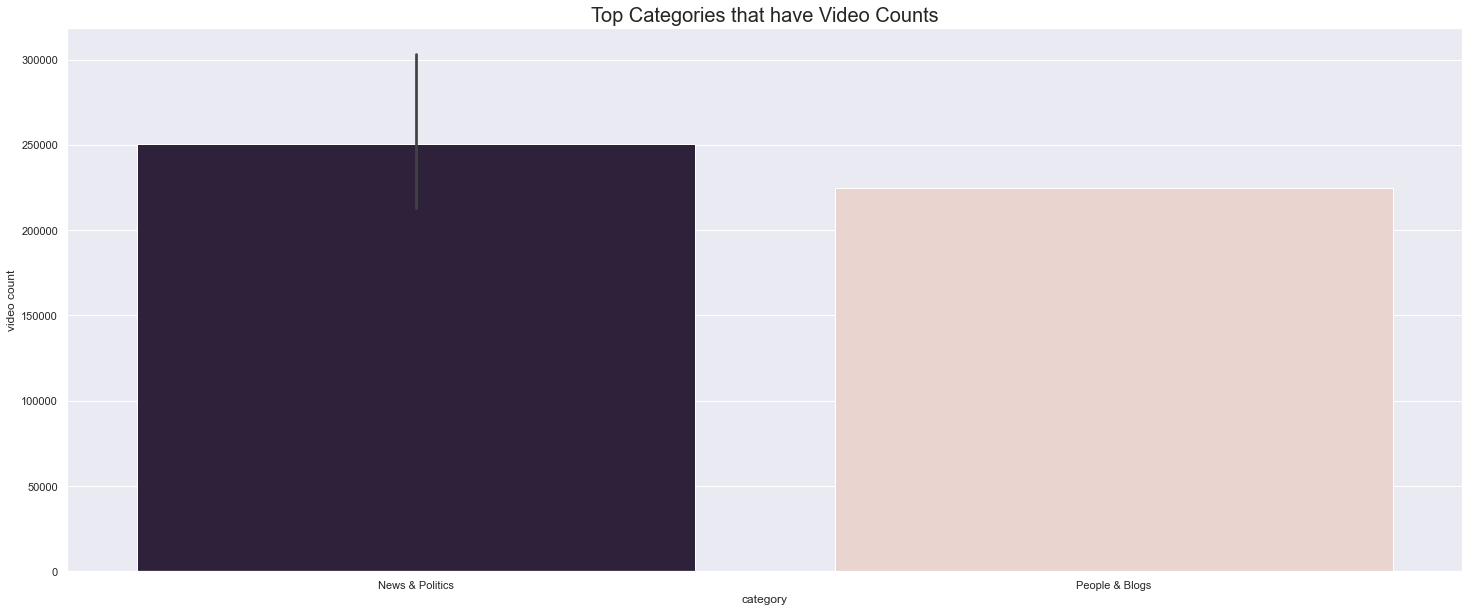

In [1195]:
videocount=df.sort_values('video count',ascending=False)
plt.figure(figsize=(25,10))
videocount=videocount[:5]
sns.barplot(x="category",
           y="video count",
           data=videocount,
           palette="ch:30_r")
plt.title('Top Categories that have Video Counts',size=20);


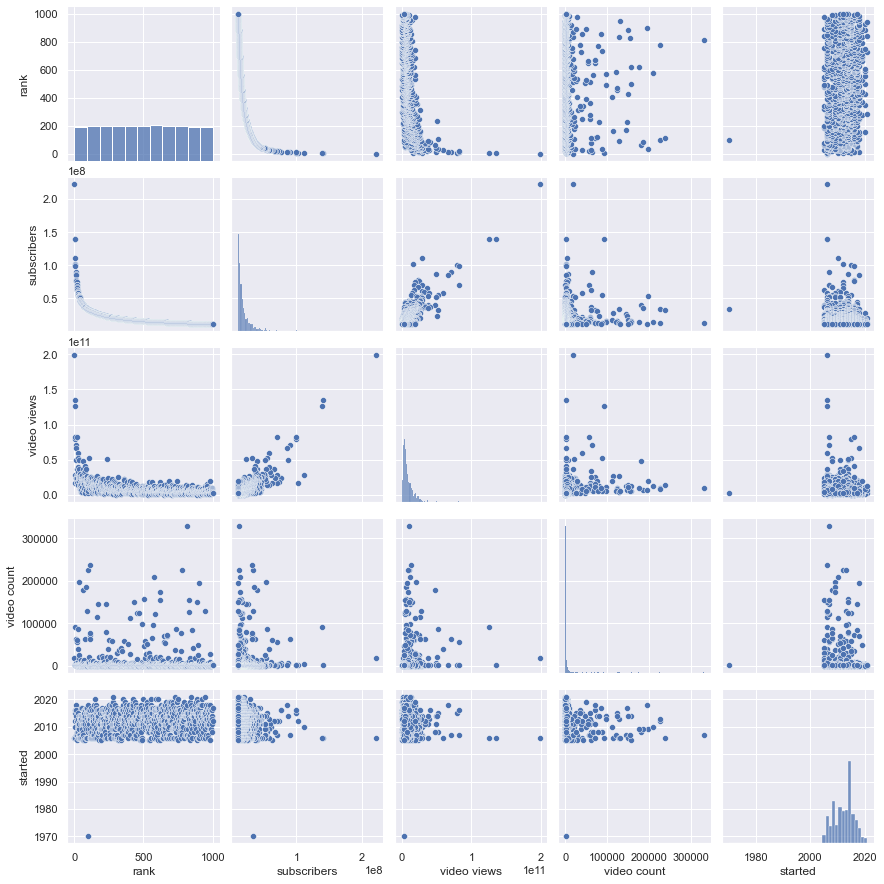

In [1196]:
sns.pairplot(df)
sns.set_theme('notebook')
plt.show();

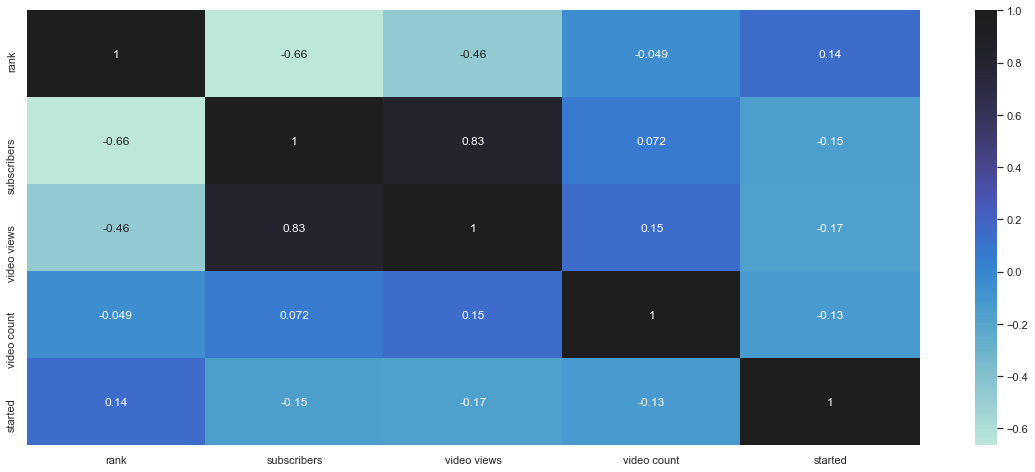

In [1197]:
plt.figure(figsize=(20,8))
sns.set_theme('notebook')
sns.heatmap(df.corr(), annot=True, center=True);

# Linear Model

In [1198]:
X = df[['video views']]
Y = df[['subscribers']]

In [1199]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [1136]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [1137]:
predictions = lm.predict(X_test)

In [1200]:
y_test = y_test.squeeze()
predictions = predictions.squeeze().astype("int64")
d = pd.DataFrame({"Actual":y_test, "Prediction":predictions})
d

,Actual,Prediction
182,25800000,30352929
284,20400000,16240148
958,11100000,19156369
502,15500000,12879842
407,17300000,19155034
...,...,...
134,29600000,15485743
559,14700000,15118885
120,30900000,14450139
952,11200000,13274677


Text(0, 0.5, 'Predicted Y')

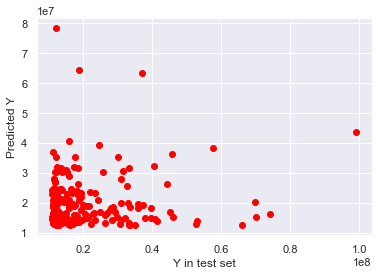

In [1201]:
plt.scatter(y_test,predictions, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

# Validation

In [1202]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 10146550.764102563
MSE: 236200007986851.56
RMSE: 15368799.822590297


In [1203]:
coefficients = pd.DataFrame(X.columns)
coefficients['coefficients']=lm.coef_[0]
# variation of the output with different inputs.
coefficients

,0,coefficients
0,video views,0.001012


In [1204]:
model = sm.OLS(Y, X).fit() 
#Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).
predictions = model.predict(X_test)

In [1205]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            subscribers   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              3300.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):                   2.01e-314
Time:                        08:26:00   Log-Likelihood:                         -17201.
No. Observations:                 971   AIC:                                  3.440e+04
Df Residuals:                     970   BIC:                                  3.441e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
video views     0.0014    2.5e-05     57.443      0.000       0.001       0.001
==============================================================================
Omnibus:                      223.961   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6380.715
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                      15.539   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Skewness Handling

Text(0, 0.5, 'Number of channels')

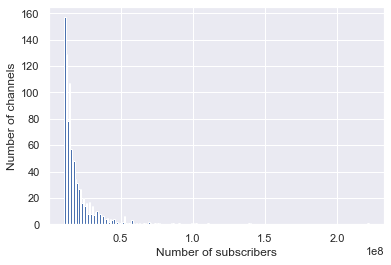

In [1206]:
df['subscribers'].hist(bins = 200)
plt.xlabel('Number of subscribers')
plt.ylabel('Number of channels')

Text(0, 0.5, 'Number of channels')

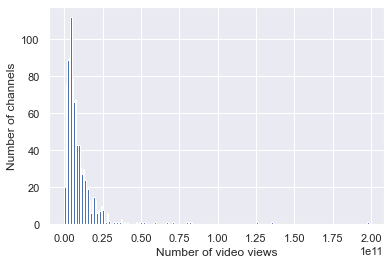

In [1207]:
df['video views'].hist(bins = 200)
plt.xlabel('Number of video views')
plt.ylabel('Number of channels')

Text(0, 0.5, 'Number of channels')

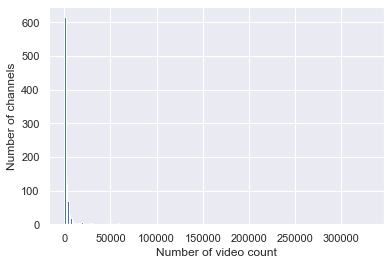

In [1208]:
df['video count'].hist(bins = 200)
plt.xlabel('Number of video count')
plt.ylabel('Number of channels')

Text(0, 0.5, 'Number of channels')

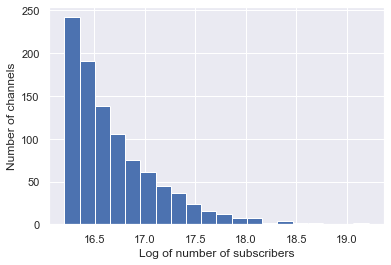

In [1209]:
# Log Transformation is pretty awesome. It makes our skewed original data more normal. It improves linearity between our dependent and independent variables
np.log(df['subscribers']).hist(bins = 20)
plt.xlabel('Log of number of subscribers')
plt.ylabel('Number of channels')

In [1210]:
df_log = pd.DataFrame()
df_log['Video_count_log'] = np.log(df['video count'])
df_log['Video_views_log'] = np.log(df['video views'])
df_log['Subscribers_log'] = np.log(df['subscribers'])

In [1211]:
df_log.head()

,Video_count_log,Video_views_log,Subscribers_log
0,9.759444,26.013849,19.218188
2,6.666957,25.632100,18.757153
3,11.421588,25.557675,18.749984
5,8.411166,24.072098,18.525041
6,6.587550,23.546575,18.440483


In [1212]:
df_log.tail()

,Video_count_log,Video_views_log,Subscribers_log
995,8.168486,22.251342,16.204273
996,6.536692,22.127037,16.204273
997,6.913737,21.852661,16.204273
998,6.722630,21.835223,16.204273
999,6.380123,21.755885,16.204273


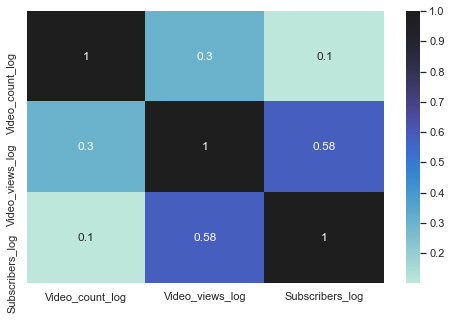

In [1213]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df_log.corr(), annot=True, center=True);

# **Linear model with log transformation**

In [1214]:
print(df.isnull().sum())

rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64


In [1215]:
X2 = df_log[['Video_count_log', 'Video_views_log']]
Y2 = df_log[['Subscribers_log']]

In [1216]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2)

In [1217]:
lm2 = LinearRegression()
lm2.fit(X2_train.dropna(),y2_train.dropna())

LinearRegression()

In [1218]:
predictions2 = lm2.predict(X2_test)

Text(0, 0.5, 'Predicted Y')

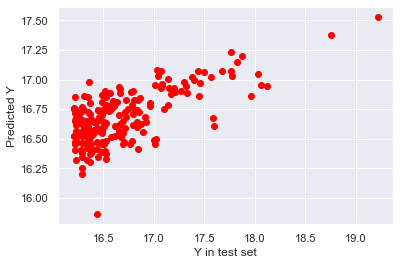

In [1219]:
plt.scatter(y2_test,predictions2, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

# Validation

In [1220]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 9533997.023483727
MSE: 145141838355501.38
RMSE: 12047482.656368565


In [1221]:
model2 = sm.OLS(Y2, X2).fit() 
predictions2 = model2.predict(X2_test)

In [1222]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Subscribers_log   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.069e+05
Date:                Thu, 13 Apr 2023   Prob (F-statistic):                        0.00
Time:                        08:26:09   Log-Likelihood:                         -841.93
No. Observations:                 971   AIC:                                      1688.
Df Residuals:                     969   BIC:                                      1698.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Video_count_log    -0.0566      0.010     -5.490      0.000      -0.077      -0.036
Video_views_log     0.7574      0.003    228.626      0.000       0.751       0.764
==============================================================================
Omnibus:                      703.000   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26998.426
Skew:                           2.837   Prob(JB):                         0.00
Kurtosis:                      28.202   Cond. No.                         13.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1223]:
def pred_from_log(x, y):
    return x ** p + y ** q

In [1224]:
X_test.head()

,video views
182,23276597783
284,11747446967
958,12321708693
502,1294519810
407,827786482


In [1225]:
vid_cnt_test = np.array(X_test['video count'])

KeyError: 'video count'

In [1226]:
prediction_log = pred_from_log(vid_cnt_test, vid_viw_test)

Text(0, 0.5, 'prediction with log transformation')

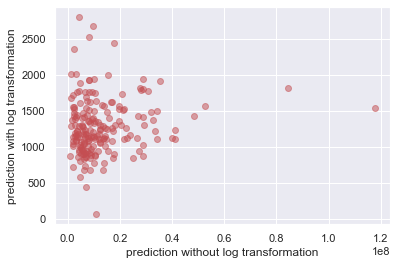

In [1227]:
plt.scatter(predictions, prediction_log, color = 'r', alpha = 0.5)
plt.xlabel('prediction without log transformation')
plt.ylabel('prediction with log transformation')

# Neural Network

In [1228]:
from sklearn.neural_network import MLPRegressor
m = MLPRegressor(hidden_layer_sizes=(8, 8, 8), activation="relu", alpha=0.0001, early_stopping=False)

In [1233]:
X = df[['video count', 'video views']]
Y = df[['subscribers']]
X.isnull().sum()

video count    0
video views    0
dtype: int64

In [1234]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [1235]:
y_test = y_test.squeeze()
predictions = predictions.squeeze().astype("int64")
d = pd.DataFrame({"Actual":y_test, "Prediction":predictions})
d

,Actual,Prediction
3,139000000.0,NaN
8,NaN,117700745.0
16,NaN,26613664.0
18,70000000.0,25088627.0
19,NaN,41022789.0
...,...,...
980,NaN,13673170.0
983,11000000.0,7483140.0
986,NaN,5292643.0
995,NaN,6618992.0


Text(0, 0.5, 'Predicted Y')

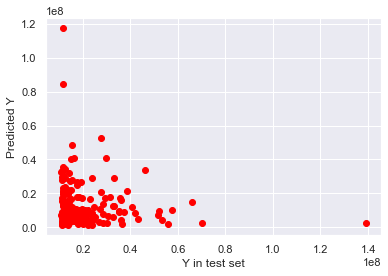

In [1236]:
plt.scatter(y_test,predictions, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

In [1237]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 14136614.2
MSE: 454052239946084.8
RMSE: 21308501.588476013
